In [2]:
import pandas as pd
import numpy as mp
import datetime
from io import StringIO
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import collections
from PIL import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
import io

%matplotlib inline


In [3]:
data = pd.read_csv(r"C:\Users\Nahid\Desktop\CSE475\dataset.csv")

In [4]:
data.head(2)

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,edu_level,improve_yourself_how
0,5/17/2016 20:04,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,Associate degree,None
1,5/17/2016 20:04,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,"Some college, no degree",join clubs/socual clubs/meet ups


In [5]:
features = data.columns
features

Index(['time', 'gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight',
       'virgin', 'prostitution_legal', 'pay_for_sex', 'friends', 'social_fear',
       'depressed', 'what_help_from_others', 'attempt_suicide', 'employment',
       'edu_level', 'improve_yourself_how'],
      dtype='object')

In [6]:
features = [x for x in features if x != 'attempt_suicide']
features

['time',
 'gender',
 'sexuallity',
 'age',
 'income',
 'race',
 'bodyweight',
 'virgin',
 'prostitution_legal',
 'pay_for_sex',
 'friends',
 'social_fear',
 'depressed',
 'what_help_from_others',
 'employment',
 'edu_level',
 'improve_yourself_how']

In [7]:
train, test = train_test_split(data, test_size = 0.07)
print(len(data))
print(len(train))
print(len(test))

469
436
33


In [8]:
dt= DecisionTreeClassifier(min_samples_split = 100, criterion='entropy')

In [9]:
x_train = train[features]
y_train = train["attempt_suicide"]

x_test = test[features]
y_test = test["attempt_suicide"]

In [10]:
from sklearn import preprocessing
import sys
le = preprocessing.LabelEncoder()
x_train = x_train.copy()
x_test = x_test.copy()
for col in features:
    if col!= 'age' and col!= 'friends' and col!= 'job':
        x_train.loc[:,col] = le.fit_transform(x_train[col])
        x_test.loc[:,col] = le.fit_transform(x_test[col])
    
dt = dt.fit(x_train,y_train)

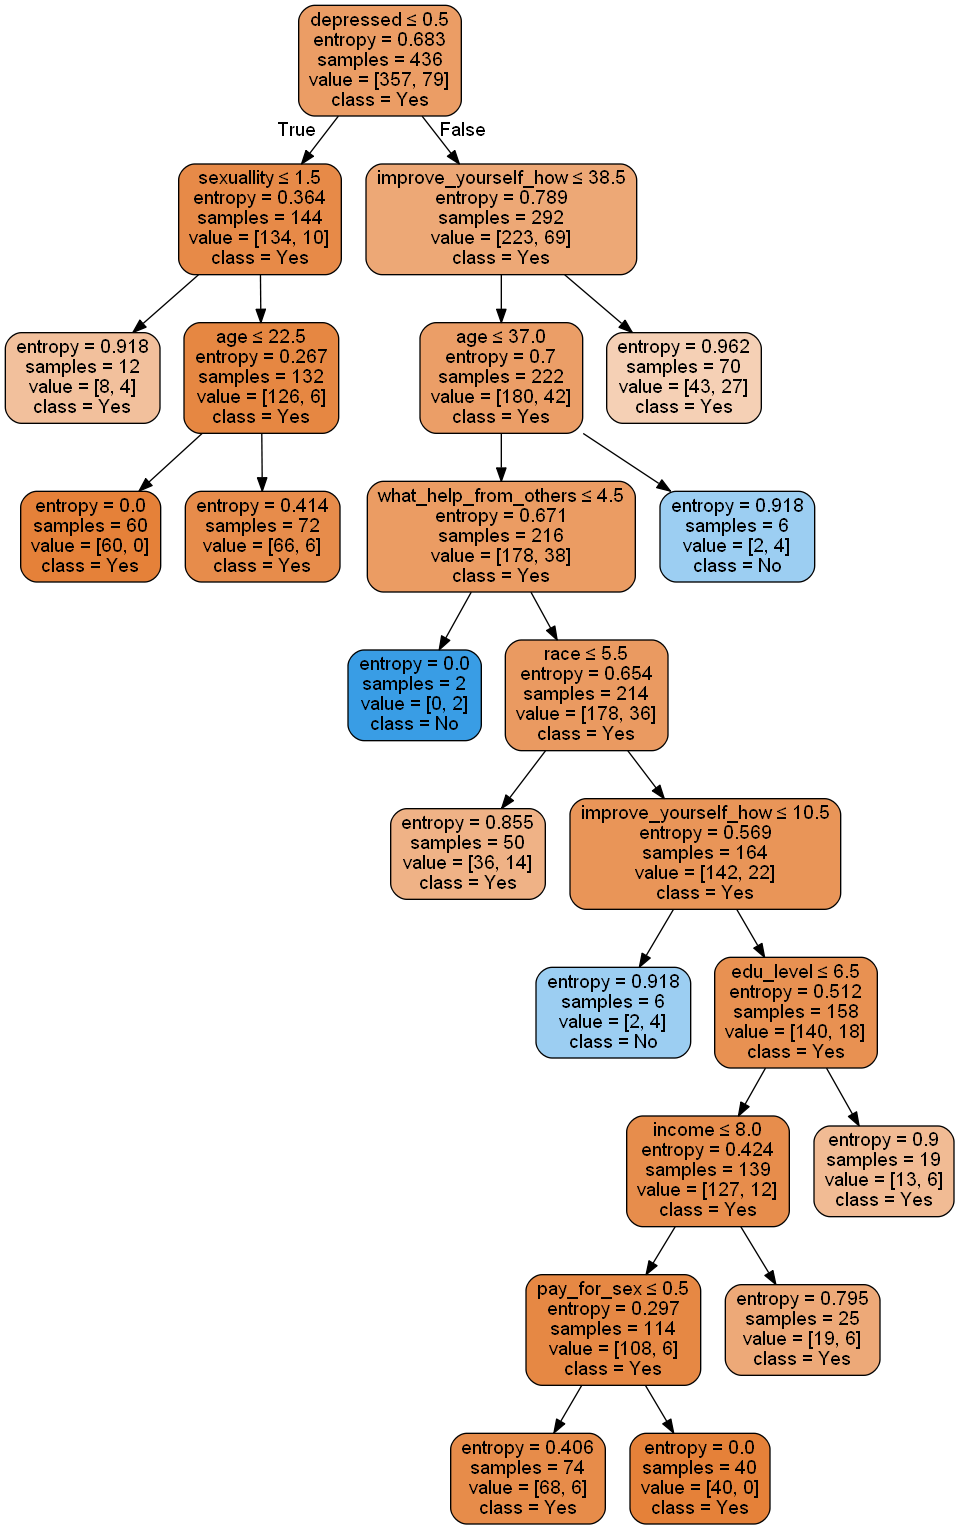

In [11]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features,  
                     class_names=data.attempt_suicide,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [12]:
y_pred = dt.predict(x_test)

In [14]:
y_pred #These are the predicted values. 

array(['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No'], dtype=object)

In [15]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using desicion Tree: ", round(score, 1), "%" )

Accuracy using desicion Tree:  66.7 %
